<a href="https://colab.research.google.com/github/rgmantovani/advancedML/blob/master/codes/aula_04_rnns_lstm/LSTM_example2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# LSTM para avaliação de quantidade de passageiros.
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
numpy.random.seed(42)

In [3]:
def create_dataset(dataset, janela_previsao=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-janela_previsao-1):
        a = dataset[i:(i+janela_previsao), 0]
        dataX.append(a)
        dataY.append(dataset[i + janela_previsao, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [4]:
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

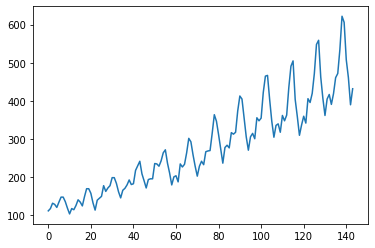

In [5]:
plt.plot(dataset)

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print(dataset[:10])

[[0.01544401]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984557]
 [0.08494207]
 [0.08494207]
 [0.06177607]
 [0.02895753]]


In [10]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [11]:
janela_previsao = 1
trainX, trainY = create_dataset(train, janela_previsao)
testX, testY = create_dataset(test, janela_previsao)

In [12]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [14]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, janela_previsao)))
model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [16]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0399
Epoch 2/100
94/94 - 0s - loss: 0.0192
Epoch 3/100
94/94 - 0s - loss: 0.0145
Epoch 4/100
94/94 - 0s - loss: 0.0131
Epoch 5/100
94/94 - 0s - loss: 0.0124
Epoch 6/100
94/94 - 0s - loss: 0.0114
Epoch 7/100
94/94 - 0s - loss: 0.0103
Epoch 8/100
94/94 - 0s - loss: 0.0095
Epoch 9/100
94/94 - 0s - loss: 0.0087
Epoch 10/100
94/94 - 0s - loss: 0.0077
Epoch 11/100
94/94 - 0s - loss: 0.0069
Epoch 12/100
94/94 - 0s - loss: 0.0062
Epoch 13/100
94/94 - 0s - loss: 0.0055
Epoch 14/100
94/94 - 0s - loss: 0.0048
Epoch 15/100
94/94 - 0s - loss: 0.0043
Epoch 16/100
94/94 - 0s - loss: 0.0037
Epoch 17/100
94/94 - 0s - loss: 0.0033
Epoch 18/100
94/94 - 0s - loss: 0.0030
Epoch 19/100
94/94 - 0s - loss: 0.0027
Epoch 20/100
94/94 - 0s - loss: 0.0025
Epoch 21/100
94/94 - 0s - loss: 0.0024
Epoch 22/100
94/94 - 0s - loss: 0.0022
Epoch 23/100
94/94 - 0s - loss: 0.0021
Epoch 24/100
94/94 - 0s - loss: 0.0021
Epoch 25/100
94/94 - 0s - loss: 0.0021
Epoch 26/100
94/94 - 0s - loss: 0.

In [17]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [18]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [19]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Teste Score: %.2f RMSE' % (testScore))

Treino: 0.04 RMSE
Teste Score: 0.10 RMSE


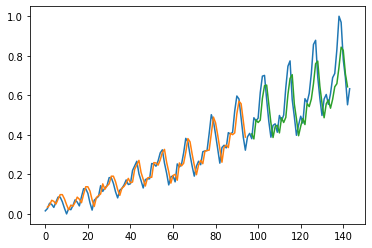

In [21]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[janela_previsao:len(trainPredict)+janela_previsao, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(janela_previsao*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()